In [ ]:
# Importar libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para ignorar avisos usamos esse warning
import warnings
warnings.filterwarnings('ignore')

# Ler os dados
base_dados = pd.read_csv('PROJETO PRÁTICO - CASE EMPRESAS UNICÓRNIO.csv')

# Verificar dimensão (linhas x colunas)
base_dados.shape

# Primeiros registros
base_dados.head()

# Renomear colunas
base_dados.rename(columns={'Unnamed: 0' : 'Id', 'Company' : 'Empresa', 'Valuation ($B)' : 'Valor ($)', 'Date Joined' : 'Data de Adesão', 'Country' : 'País', 'City' : 'Cidade', 'Industry' : 'Setor', 'Select Investors' : 'Investidores'}, inplace=True)

# Verificar o tipo da informação
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


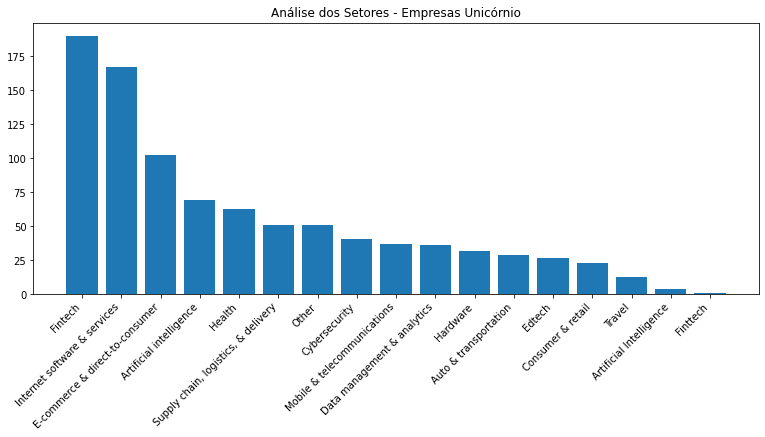

In [ ]:
# Verificar quantos campos em branco temos em cada coluna
base_dados.isnull().sum()

# Verificar campos unicos
base_dados.nunique()

# Verificar o nome dos campos unicos de uma coluna
base_dados['Setor'].unique()

# Ranking com a quantidade de valores únicos de uma coluna 
base_dados['Setor'].value_counts() 

# Representação gráfica das empresas unicórnio
plt.figure( figsize = (13,5) )
plt.title( 'Análise dos Setores - Empresas Unicórnio')
plt.bar( base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts() )
plt.xticks( rotation = 45, ha = 'right');


In [ ]:
# Ranking de empresas unicórnio por países dividido em porcentagem
analise = round ( base_dados['País'].value_counts( normalize = True ) * 100, 1 )

In [ ]:
analise.head(10)

United States     51.0
China             18.1
India              5.4
United Kingdom     4.0
Germany            2.5
Israel             2.2
France             2.0
Canada             1.6
Brazil             1.6
South Korea        1.2
Name: País, dtype: float64

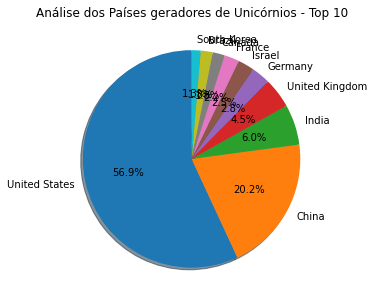

In [ ]:
# Representação gráfica do Top 10 países por mais unicórnios
plt.figure( figsize = (13, 5) )
plt.title('Análise dos Países geradores de Unicórnios - Top 10')
plt.pie( 
	analise.head(10),
	labels = analise.index[0:10],
	shadow = True,
	startangle = 90,
	autopct = '%1.1f%%'
);


In [ ]:
# Conversão para data
base_dados['Data de Adesão'] = pd.to_datetime( base_dados['Data de Adesão'] )
base_dados['Data de Adesão'].head()

# Extrair o Ano e Mês
base_dados['Mês'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analítica
analise_agrupada = base_dados.groupby( by=['País', 'Ano', 'Mês', 'Empresa'] ).count()['Id'].reset_index()
analise_agrupada

,País,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
analise_agrupada.loc[
	analise_agrupada['País'] == 'Brazil']

,País,Ano,Mês,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
base_dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analítica dos países
analise_pais = base_dados.groupby( by = ['País']).sum()['Valor ($)'].reset_index()
analise_pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
#Análise de valor
analise_valor = analise_pais.sort_values( 'Valor ($)', ascending = False)
analise_valor.head()

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


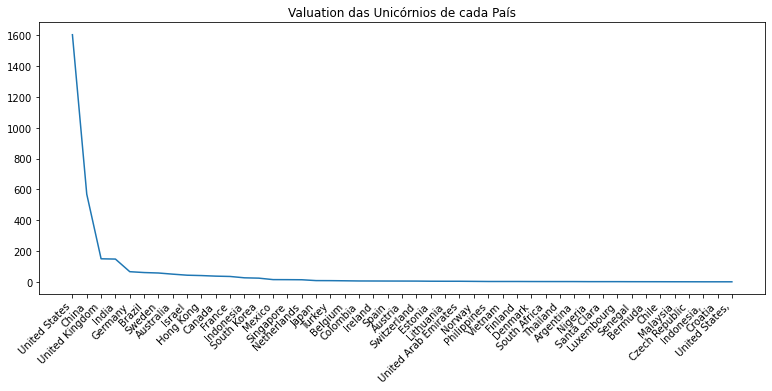

In [ ]:
#Representação gráfica a partir dos valores dos unicornios de cada país
plt.figure( figsize = (13,5))
plt.title('Valuation das Unicórnios de cada País')
plt.plot( analise_valor['País'], analise_valor['Valor ($)'])
plt.xticks( rotation = 45, ha = 'right');